# Proyecto Final 

## SFI's con gráficas dirigidas

## Seminario de geometría

Jorge Vasquez Arriaga

In [1]:
using Colors, Images, FileIO

include("src/Metrics.jl")
include("src/HausdorffMetrics.jl")
include("src/ColorUtils.jl")
include("src/RectangularRegionV1.jl")
include("src/Attractors.jl") 
include("src/IFS.jl")

6-element Vector{Function}:
 cloud_w1 (generic function with 1 method)
 cloud_w2 (generic function with 1 method)
 cloud_w3 (generic function with 1 method)
 cloud_w4 (generic function with 1 method)
 cloud_w5 (generic function with 1 method)
 cloud_w6 (generic function with 1 method)

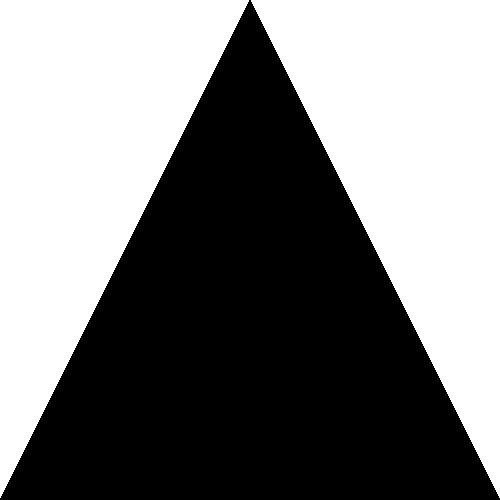

In [2]:
d = RectangularRegion(0, 1, 0, 1, width=500, height=500)
W, H = size(draw(d))
# dibuar un triangulo de la manera adecuada
# colorear los pixeles que pertenecen al conjunto
color_ = RGB(0,0,0)
for h in 1:500
    if h%2==0
        j=h÷2-1
    else
        j=h÷2
    end
    for w in 1+j:500-j
        pixel!(d, (w, 501-h), color_)
    end
end
draw(d)

In [3]:
# función que aplica una transformación de un RectangularRegion a otra

# argumentos RR_ant: RectangularRegion inicial; wi: Transformación a aplicar;
# newRR: RectangularRegion donde se aplica la transormación, colormew: color, con este se colorea la transormación 
function RR_wi_color(RR_ant, wi; newRR=RectangularRegion(0, 1, 0, 1), colornew=RGB(0,0,0))
    # obtener el Weight and Height
    W, H = size(draw(RR_ant))
    for w in 1:W
        for h in 1:H # Recorrer los pixeles de la imagen inicial
            if RR_ant.img[h,w] != RGB(1,1,1) # si el pixel no es blanco (pertenece al conjunto)
                point_ = pixeltopoint(RR_ant, (w,h)) #obtener el punto
                pixel_ = pointtopixel(RR_ant, wi(point_)) #aplicarle la transormación y convertirlo a pixel
                if containspixel(newRR, pixel_) # si la nueva RR contiene el punto , dibujarlo con un color
                    pixel!(newRR, pixel_, colornew)
                end #end contain pixel
            end #end pixel = RGB(1,1,1)
        end # end H
    end #end W
    return newRR #regresar la nueva región
end

RR_wi_color (generic function with 1 method)

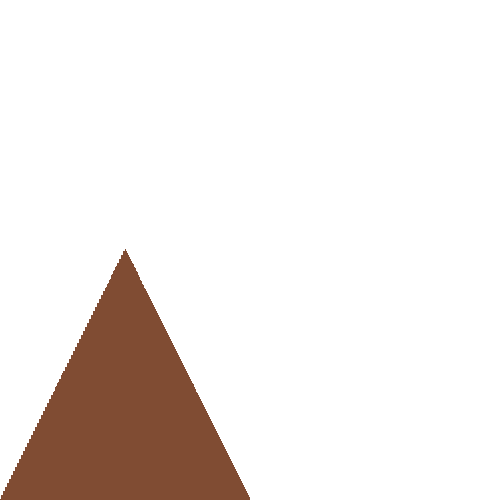

In [4]:
# Ejemplo
d_ = deepcopy(d)
# aplicamosa d la transformación wi
wi(p) = p/2
RR_w = RR_wi_color(d_ , wi, colornew=RGB(0.5,0.3,0.2))
draw(RR_w)

In [5]:
# función que aplica una transformación de un RectangularRegion a otra
# hace exactamente lo mismo que la anterior pero no aplica una coloración a los pixeles de la nueva imagen
function RR_wi(RR_ant, wi; newRR=RectangularRegion(0, 1, 0, 1))
    W, H = size(draw(RR_ant))
    for w in 1:W
        for h in 1:H
            if RR_ant.img[h,w] != RGB(1,1,1)

                color_ = pixel(RR_ant, w, h)

                point_ = pixeltopoint(RR_ant, (w,h))
                pixel_ = pointtopixel(RR_ant, wi(point_))
                if containspixel(newRR, pixel_)
                    pixel!(newRR, pixel_, color_)
                end
            end
        end
    end
    return newRR
end

RR_wi (generic function with 1 method)

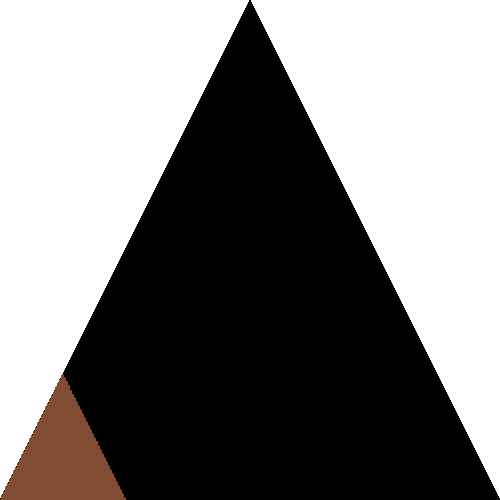

In [6]:
# Ejemplo

# Aplicamos la transformacion wi del espacio RR_w al espacio d
RR_new_ = RR_wi(RR_w, wi; newRR=d_)
draw(RR_new_)

**Matriz Asociada a un DGIFS**

Para la siguiente parte del código introducimos algo que llamamos **Matriz Asociada a DGIFS**, la cual es una matriz de tamaño $\# V, \# V$, es decir una matriz cuadrada de la cardinalidad del número de vértices. \
Empezamos rellenando la matriz con ceros, luego para cada arista $e\in E^1$, hacemos la entrada $[t(e), i(e)]$ de la matriz sea igual a $S_e$. Al momento de implementar esta función podemos enumerar las contracciones $S_e$ y en la matriz colocar el número correspondiente a la contracción.

Una vez teniendo la Matriz Asociada a DGIFS podemos implementar una función que dado un vértice \texttt{vi} le aplique todas sus transformaciones correspondientes para una iteración. En la Figura \ref{img:IterOne} se presenta la implementación.


In [7]:
using LinearAlgebra

M = zeros(Int, 4, 4)
M[1,2] = 2
M[1,3] = 3
M[1,4] = 1
M[2,1] = 3
M[2,3] = 2
M[2,4] = 1
M[3,1] = 1
M[3,2] = 3
M[3,4] = 2
M[4,2] = 1
M[4,3] = 2

M

4×4 Matrix{Int64}:
 0  2  3  1
 3  0  2  1
 1  3  0  2
 0  1  2  0

In [8]:
# Función que le aplica las transformaciones a un vértice 

# argumentos M:Matriz asociada al DGIFS; space_vis:Compactos iniciales asociados a cada vértice
# rr_ = RectangularRegion donde se encuentra el space_vis; ifs: el 
function iterateOne(M, space_vis, vertex,;rr_ = RectangularRegion(0, 1, 0, 1), ifs=trs_ifs)
    iter_ = rr_
    for i in 1:size(M)[1] #recorre todos los vértices
        if  M[vertex,:][i] != 0 #revisa cuales inciden en el vértice
            iter_ = RR_wi(space_vis[i], ifs[M[vertex,:][i]], newRR=iter_) #lsi inciden se le aplica la transformación
        end
    end
    return iter_ # regresa el espacio con las transformaciones
end

iterateOne (generic function with 1 method)

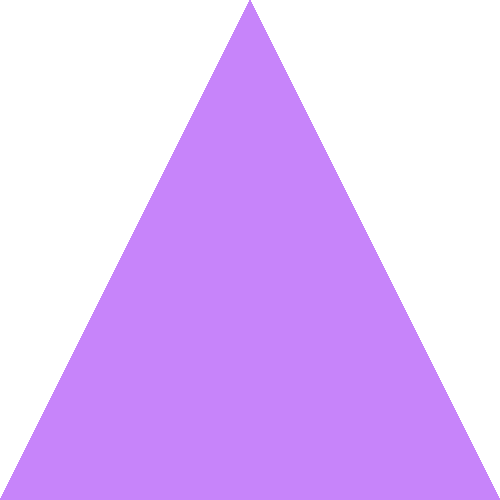

In [9]:
# dibujamos los compactos iniciales asociados a cada vértice (soace_vis)
id(p) = p
reg_ = RR_wi_color(d , id, colornew=RGB(0.5,0.3,0.2))
v1 = RR_wi_color(d , id, colornew=RGBA(242/255, 250/255, 170/255, 0.98))
v2 = RR_wi_color(d , id, colornew=RGBA(250/255, 181/255, 145/255, 0.98))
v3 = RR_wi_color(d , id, colornew=RGBA(120/255, 250/255, 245/255, 0.98))
v4 = RR_wi_color(d , id, colornew=RGBA(199/255, 132/255, 250/255, 0.98))

v = [v1, v2, v3, v4]

draw(v[4])

In [10]:
#sistema de función iterado

trs1(p) = 1/2*p
trs2(p) = (1/2*p[1] + 1/2, 1/2*p[2])
trs3(p) = (1/2*p[1] + 1/4, 1/2*p[2] + 1/2)

trs_ifs =  [trs1, trs2, trs3]

3-element Vector{Function}:
 trs1 (generic function with 1 method)
 trs2 (generic function with 1 method)
 trs3 (generic function with 1 method)

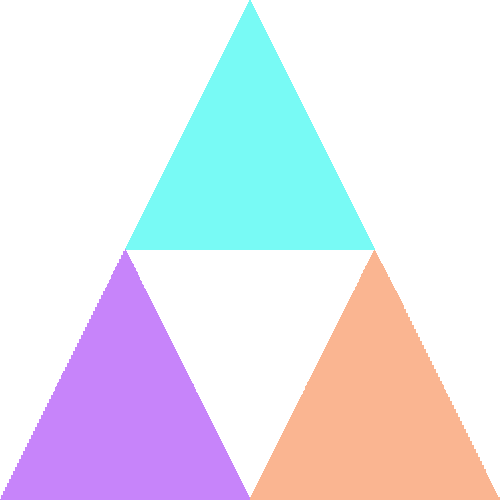

In [11]:
draw(iterateOne(M, v, 1)) #vertex=1

In [12]:
# Función que le aplica las transformaciones a todos los vértice 
# arumentos, initial_vis: espacio de vértices iniciales, M Matriz asociada al DGIFS
function iterateVis(initial_vis, M)
    vis = initial_vis
    nvis = copy(vis)
    n = size(M)[1]
    for i in 1:n #aplicamos la función que hace transformaciones a todos los vertices
        nvis[i] = iterateOne(M, vis, i) 
    end
    return nvis
end

iterateVis (generic function with 1 method)

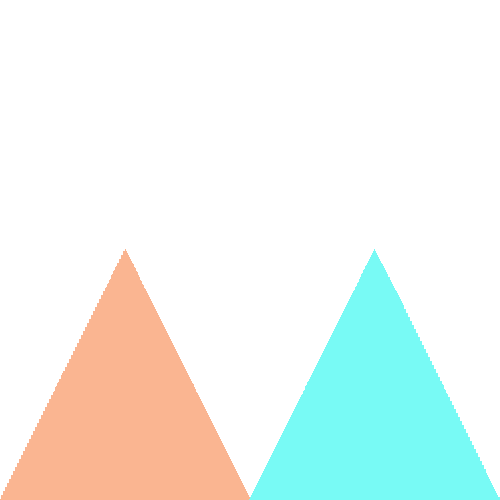

In [13]:
iter1 = iterateVis(v, M)
draw(iter1[4])

In [14]:
# función que aplica transformaciones a los vértices nrep-veces

# argumentos nrep; número de iteraciones, initial_vis: espacio de vértices iniciales, M Matriz asociada al DGIFS
function replicateIterSave(nrep, initial_vis, M)
    new_vis = iterateVis(initial_vis, M)
    lista = [new_vis] #lista para guardar cada una de las iteraciones
        for i in 1:nrep-1 #hacemos nrep iteraciones
            new_vis = iterateVis(new_vis, M) #aplicar las debidas transformaciones a todos los vértices
            push!(lista, new_vis) #guardamos esta iteración
        end
    return lista #regresamos todas las iteraciones
end

replicateIterSave (generic function with 1 method)

In [15]:
iter_ = replicateIterSave(15, v, M)

15-element Vector{Vector{RectangularRegion}}:
 [RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569); RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569)]), RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.471,0.98,0.961) RGB{N0f8}(0.471,0.98,0.961); RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.471,0.98,0.961) RGB{N0f8}(0.471,0.98,0.961)]), RectangularRegion(0, 1, 0, 1, RGB{N0f8}[

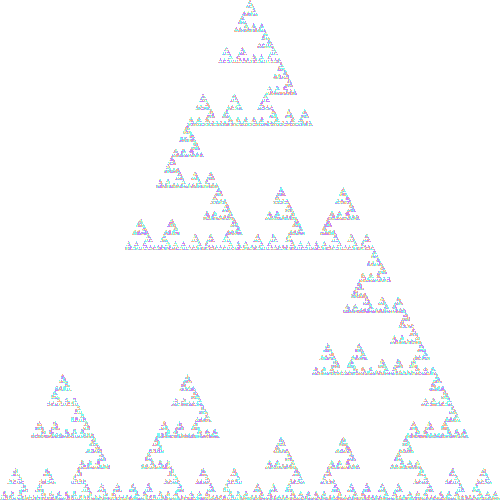

In [16]:
draw(iter_[1][1])
draw(iter_[2][1])
draw(iter_[3][1])
draw(iter_[14][1])

Tree DGIFS

In [17]:
tree_ifs

4-element Vector{Function}:
 tree_w1 (generic function with 1 method)
 tree_w2 (generic function with 1 method)
 tree_w3 (generic function with 1 method)
 tree_w4 (generic function with 1 method)

In [18]:
M2 = zeros(Int, 5, 5)
M2[1,2] = 2
M2[1,3] = 3
M2[1,4] = 1
M2[2,1] = 4
M2[2,3] = 2
M2[2,4] = 1
M2[3,1] = 1
M2[3,2] = 0
M2[3,4] = 2
M2[4,2] = 1
M2[4,3] = 2
M2[1,5] = 4
M2[2,5] = 3
M2[4,1] = 3
M2[5,1] = 1
M2[5,2] = 4
M2[5,3] = 3
M2[5,3] = 3
M2[5,4] = 2

M2

5×5 Matrix{Int64}:
 0  2  3  1  4
 4  0  2  1  3
 1  0  0  2  0
 3  1  2  0  0
 1  4  3  2  0

In [19]:
# aquí se redefine la función IterateOne para darle como argumento el nuevo IFS en este caso tree_ifs
function iterateOne(M, space_vis, vertex, rr_ = RectangularRegion(-3,3,-1,5), ifs=tree_ifs)
    iter_ = rr_
    for i in 1:size(M)[1]
        if  M[vertex,:][i] != 0
            iter_ = RR_wi(space_vis[i], ifs[M[vertex,:][i]], newRR=iter_)
        end
    end
    return iter_
end

iterateOne (generic function with 3 methods)

In [20]:

v1 = RR_wi_color(d , id, colornew=RGBA(242/255, 250/255, 170/255, 0.98))
v2 = RR_wi_color(d , id, colornew=RGBA(250/255, 181/255, 145/255, 0.98))
v3 = RR_wi_color(d , id, colornew=RGBA(120/255, 250/255, 245/255, 0.98))
v4 = RR_wi_color(d , id, colornew=RGBA(199/255, 132/255, 250/255, 0.98))
v5 = RR_wi_color(d , id, colornew=RGBA(219/255, 162/255, 220/255, 0.98))

v_2 = [v1, v2, v3, v4, v5]

5-element Vector{RectangularRegion}:
 RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667) … RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667); RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667) … RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667)])
 RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569); RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569)])
 RectangularRegion(0, 1, 0, 1, RGB{N0f8

In [21]:
iter3_ = replicateIterSave(15, v_2, M2)

15-element Vector{Vector{RectangularRegion}}:
 [RectangularRegion(-3, 3, -1, 5, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0)]), RectangularRegion(-3, 3, -1, 5, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0)]), RectangularRegion(-3, 3, -1, 5, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1

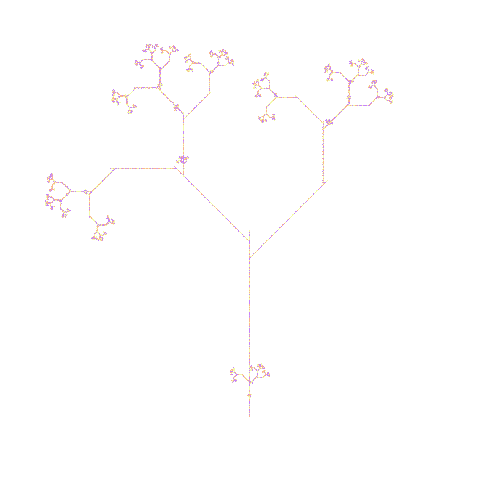

In [22]:
draw(iter3_[15][1])
draw(iter3_[15][2])
draw(iter3_[15][5])
draw(iter3_[15][5])
draw(iter3_[15][5])

Complejos

In [23]:
# función que aplica una transformación de un RectangularRegion a otra
# hace exactamente lo mismo que la anterior pero no aplica una coloración a los pixeles de la nueva imagen
function RR_wiC(RR_ant, wi; newRR=RectangularRegion(0, 1, 0, 1))
    W, H = size(draw(RR_ant))
    for w in 1:W
        for h in 1:H
            if RR_ant.img[h,w] != RGB(1,1,1)

                color_ = pixel(RR_ant, w, h)

                point_ = pixeltocomplex(RR_ant, (w,h))
                pixel_ = complextopixel(RR_ant, wi(point_))
                if containspixel(newRR, pixel_)
                    pixel!(newRR, pixel_, color_)
                end
            end
        end
    end
    return newRR
end

RR_wiC (generic function with 1 method)

In [24]:
# Función que le aplica las transformaciones a un vértice 

# argumentos M:Matriz asociada al DGIFS; space_vis:Compactos iniciales asociados a cada vértice
# rr_ = RectangularRegion donde se encuentra el space_vis; ifs: el 
function iterateOneC(M, space_vis, vertex,;rr_ = RectangularRegion(0, 1, 0, 1), ifs=Δsierpinsky_ifs)
    iter_ = rr_
    for i in 1:size(M)[1] #recorre todos los vértices
        if  M[vertex,:][i] != 0 #revisa cuales inciden en el vértice
            iter_ = RR_wiC(space_vis[i], ifs[M[vertex,:][i]], newRR=iter_) #lsi inciden se le aplica la transformación
        end
    end
    return iter_ # regresa el espacio con las transformaciones
end

iterateOneC (generic function with 1 method)

In [25]:
# Función que le aplica las transformaciones a todos los vértice 
# arumentos, initial_vis: espacio de vértices iniciales, M Matriz asociada al DGIFS
function iterateVisC(initial_vis, M)
    vis = initial_vis
    nvis = copy(vis)
    n = size(M)[1]
    for i in 1:n #aplicamos la función que hace transformaciones a todos los vertices
        nvis[i] = iterateOneC(M, vis, i) 
    end
    return nvis
end

iterateVisC (generic function with 1 method)

In [26]:
# función que aplica transformaciones a los vértices nrep-veces

# argumentos nrep; número de iteraciones, initial_vis: espacio de vértices iniciales, M Matriz asociada al DGIFS
function replicateIterSaveC(nrep, initial_vis, M)
    new_vis = iterateVisC(initial_vis, M)
    lista = [new_vis] #lista para guardar cada una de las iteraciones
        for i in 1:nrep-1 #hacemos nrep iteraciones
            new_vis = iterateVisC(new_vis, M) #aplicar las debidas transformaciones a todos los vértices
            push!(lista, new_vis) #guardamos esta iteración
        end
    return lista #regresamos todas las iteraciones
end

replicateIterSaveC (generic function with 1 method)

In [27]:
iterC_ = replicateIterSaveC(15, v, M)

15-element Vector{Vector{RectangularRegion}}:
 [RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569); RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569)]), RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.471,0.98,0.961) RGB{N0f8}(0.471,0.98,0.961); RGB{N0f8}(0.78,0.518,0.98) RGB{N0f8}(0.78,0.518,0.98) … RGB{N0f8}(0.471,0.98,0.961) RGB{N0f8}(0.471,0.98,0.961)]), RectangularRegion(0, 1, 0, 1, RGB{N0f8}[

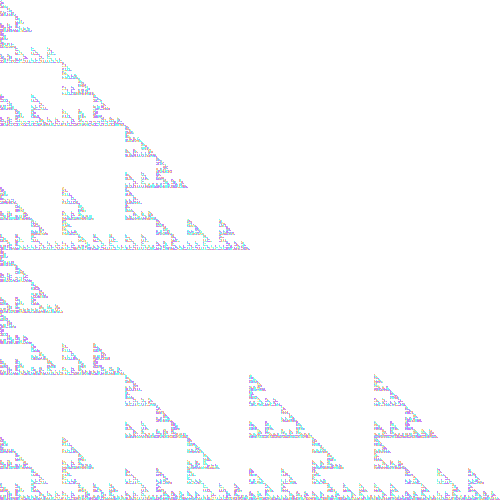

In [28]:
draw(iterC_[15][3])

In [29]:
M3 = zeros(Int, 3, 3)

M3[1,2] = 2
M3[1,3] = 1
M3[2,1] = 2
#M3[2,3] = 1
M3[3,1] = 1
M3[3,2] = 2

M3

3×3 Matrix{Int64}:
 0  2  1
 2  0  0
 1  2  0

In [30]:
# Función que le aplica las transformaciones a un vértice 

# argumentos M:Matriz asociada al DGIFS; space_vis:Compactos iniciales asociados a cada vértice
# rr_ = RectangularRegion donde se encuentra el space_vis; ifs: el 
function iterateOneC(M, space_vis, vertex,;rr_ = RectangularRegion(-1, 1, -1, 1), ifs=dragonheighway_ifs)
    iter_ = rr_
    for i in 1:size(M)[1] #recorre todos los vértices
        if  M[vertex,:][i] != 0 #revisa cuales inciden en el vértice
            iter_ = RR_wiC(space_vis[i], ifs[M[vertex,:][i]], newRR=iter_) #lsi inciden se le aplica la transformación
        end
    end
    return iter_ # regresa el espacio con las transformaciones
end

iterateOneC (generic function with 1 method)

In [31]:
newv_ = [v1, v2, v3]

3-element Vector{RectangularRegion}:
 RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667) … RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667); RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667) … RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667)])
 RectangularRegion(0, 1, 0, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569); RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569)])
 RectangularRegion(0, 1, 0, 1, RGB{N0f8

In [32]:
iter2C_ = replicateIterSaveC(15, newv_, M3)

15-element Vector{Vector{RectangularRegion}}:
 [RectangularRegion(-1, 1, -1, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(0.471,0.98,0.961) RGB{N0f8}(0.471,0.98,0.961) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(0.471,0.98,0.961) RGB{N0f8}(0.471,0.98,0.961) … RGB{N0f8}(0.98,0.71,0.569) RGB{N0f8}(0.98,0.71,0.569)]), RectangularRegion(-1, 1, -1, 1, RGB{N0f8}[RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0); … ; RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(1.0,1.0,1.0); RGB{N0f8}(1.0,1.0,1.0) RGB{N0f8}(1.0,1.0,1.0) … RGB{N0f8}(0.949,0.98,0.667) RGB{N0f8}(0.949,0.98,0.667)]), RectangularRegion(-1, 1, -1, 1, RGB{N0f8}[RGB{N0f

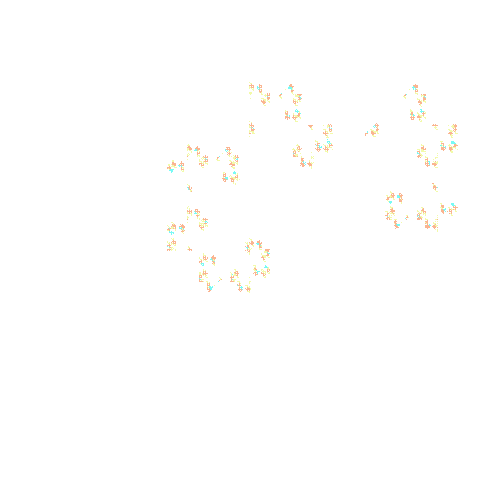

In [33]:
draw(iter2C_[15][3])